In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Test_Y=pd.read_csv("/content/drive/MyDrive/DR_project/Test_Y_2.csv")

In [4]:
Train_X=np.load("/content/drive/MyDrive/DR_project/Train_X_whole.npy")

In [5]:
Train_Y=pd.read_csv("/content/drive/MyDrive/DR_project/Train_Y_whole.csv")

In [9]:
Test_X=np.load("/content/drive/MyDrive/DR_project/Test_X_2.npy")

In [10]:
model=Sequential()
model.add(Conv2D(96, (3, 3), padding='valid', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='valid', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='valid', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 96)      2688      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 96)      384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 254, 254, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 96)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      55360     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

In [11]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.Precision(),
              keras.metrics.Recall()])

In [14]:
history = model.fit(Train_X, Train_Y, validation_split=0.2, epochs=12, batch_size=32)

Epoch 1/12
346/346 [==============================] - 81s 196ms/step - loss: 1.1285 - precision: 0.6040 - recall: 0.4303 - val_loss: 2.2093 - val_precision: 0.0298 - val_recall: 0.0109
Epoch 2/12
346/346 [==============================] - 67s 192ms/step - loss: 1.0179 - precision: 0.6341 - recall: 0.5162 - val_loss: 3.5931 - val_precision: 0.0301 - val_recall: 0.0264
Epoch 3/12
346/346 [==============================] - 67s 193ms/step - loss: 0.9842 - precision: 0.6476 - recall: 0.5221 - val_loss: 3.6137 - val_precision: 0.0868 - val_recall: 0.0735
Epoch 4/12
346/346 [==============================] - 68s 197ms/step - loss: 0.9451 - precision: 0.6653 - recall: 0.5419 - val_loss: 3.3719 - val_precision: 0.0571 - val_recall: 0.0435
Epoch 5/12
346/346 [==============================] - 68s 196ms/step - loss: 0.9062 - precision: 0.6824 - recall: 0.5481 - val_loss: 3.1201 - val_precision: 0.0996 - val_recall: 0.0775
Epoch 6/12
346/346 [==============================] - 67s 194ms/step - loss

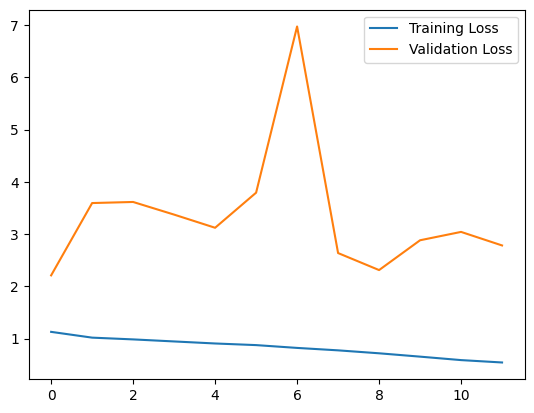

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [16]:
preds2=model.predict(test_images)

105/105 [==============================] - 6s 57ms/step


In [20]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(Test_Y.values, axis=1), np.argmax(preds2, axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83      2426
           1       0.14      0.01      0.02       230
           2       0.27      0.05      0.08       534
           3       0.17      0.05      0.07        85
           4       0.23      0.16      0.19        76

    accuracy                           0.71      3351
   macro avg       0.31      0.25      0.24      3351
weighted avg       0.60      0.71      0.63      3351



In [22]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(np.argmax(Test_Y.values, axis=1), preds2, average='macro',multi_class='ovr')


In [23]:
print("Multiclass AUC-ROC:", auc_roc)

Multiclass AUC-ROC: 0.6636967144459668
